In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

In [15]:
df = pd.read_csv('standard_curve.csv')
df.index = ['A', 'B', 'C']
df.columns = ['0', '2', '4', '6', '8', '10']
df

,0,2,4,6,8,10
A,0.065,0.210,0.295,0.326,0.385,0.354
B,0.048,0.174,0.315,0.340,0.365,0.373
C,0.040,0.157,0.264,0.355,0.354,0.357


In [16]:
df_avg = pd.DataFrame(df.mean(axis=0)).T
df_avg.index = ['avg']
df_avg

,0,2,4,6,8,10
avg,0.051,0.180333,0.291333,0.340333,0.368,0.361333


* marked for result

In [17]:
df_merged = pd.concat([df, df_avg])
df_merged

,0,2,4,6,8,10
A,0.065,0.210000,0.295000,0.326000,0.385,0.354000
B,0.048,0.174000,0.315000,0.340000,0.365,0.373000
C,0.040,0.157000,0.264000,0.355000,0.354,0.357000
avg,0.051,0.180333,0.291333,0.340333,0.368,0.361333


# make standard curve

In [14]:
df_avg

,0,2,4,6,8,10
avg,0.051,0.180333,0.291333,0.340333,0.368,0.361333


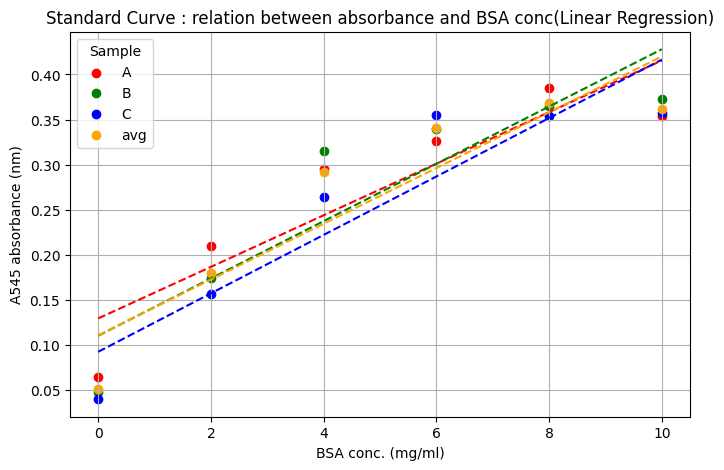

In [22]:
# Prepare data for linear regression
x = df.columns.astype(float)  # BSA concentrations (mg/ml)
colors = ['red', 'green', 'blue', 'orange']
labels = ['A', 'B', 'C', 'avg']

plt.figure(figsize=(8, 5))

for i, row in enumerate(['A', 'B', 'C', 'avg']):
    y = df_merged.loc[row].values.astype(float)  # A545 absorbance
    plt.scatter(x, y, color=colors[i], label=labels[i])
    # Linear regression for each row
    coef = np.polyfit(x, y, 1)
    y_fit = np.polyval(coef, x)
    plt.plot(x, y_fit, color=colors[i], linestyle='--')

plt.xlabel('BSA conc. (mg/ml)')
plt.ylabel('A545 absorbance (nm)')
plt.title('Standard Curve : relation between absorbance and BSA conc(Linear Regression)')
plt.legend(title='Sample')
plt.grid(True)
plt.show()

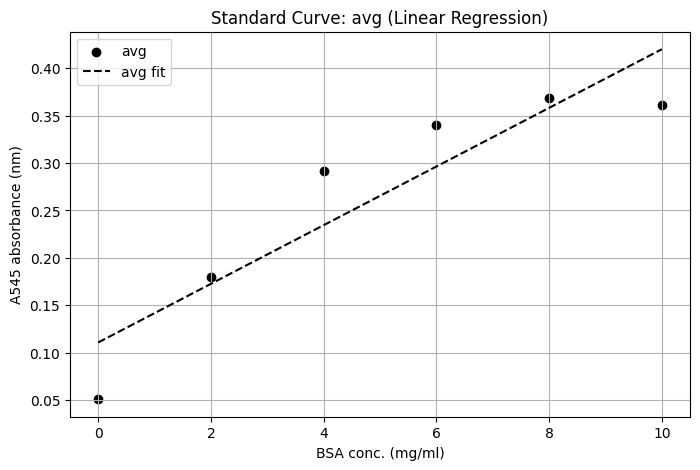

In [26]:
# Show only avg linear regression

x = df.columns.astype(float)  # BSA concentrations (mg/ml)
y = df_merged.loc['avg'].values.astype(float)  # A545 absorbance (avg)

plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='black', label='avg')

# Linear regression for avg
coef = np.polyfit(x, y, 1)
y_fit = np.polyval(coef, x)
plt.plot(x, y_fit, color='black', linestyle='--', label='avg fit')

plt.xlabel('BSA conc. (mg/ml)')
plt.ylabel('A545 absorbance (nm)')
plt.title('Standard Curve: avg (Linear Regression)')
plt.legend()
plt.grid(True)
plt.show()